### navie bayes: 

és descomposar les variables dependents entre si en comptes de fer l'histograma
de totes les variables juntes, fer-les per separat i multiplicar les probabilitats

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# diccionari per saber si es discreta o continua 1 continua i 0 discreta
# num es el que volem predir (target)

X = {
    'age': 1, 
    'sex': 0,
    'cp': 0,
    'trestbps': 1,
    'chol': 1,
    'fbs': 0,
    'restecg': 0,
    'thalach': 1,
    'exang': 0,
    'oldpeak': 1,
    'slope': 0,
    'ca': 0,
    'thal': 0,    
}

Y = ['target']

In [3]:
cols = [x for x in X.keys()] + Y

In [4]:
df = pd.read_csv("../Dades/cleveland/processed.cleveland.data", names = cols)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Data exploration

In [6]:
df.target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [7]:
df.target.value_counts(normalize = True)

0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: target, dtype: float64

In [8]:
# convertir target amb binaria sans / malalt
df['target'] = df['target'].apply(lambda x: x > 0)

### Variable es soroll si el histograma és pla (tots els valors tenen la mateixa probabilitat de sortir)
- Per això nomès en tenim 14. ja han fet la selecció de variables. 
- Variable amb soroll no afecta al model bayesia (és tonteria posar-lo).
- Hem de definir si una variable té valor predictiu o no (aquestes no).
- Si es una analitica que costa X diners, no cal fer-la, no té correlació.
- Com que es proporcional, estem multiplicant per el mateix en cada comparació.

In [9]:
# Canvi de target a true false
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,True


In [10]:
df.groupby('target').target.value_counts()

target  target
False   False     164
True    True      139
Name: target, dtype: int64

### La variable target l'hem arreglat. 
- Ara mirem si cada variable té potencial predictiu.
- Fem un histograma per cada variable i posant el sa/malat amb colors

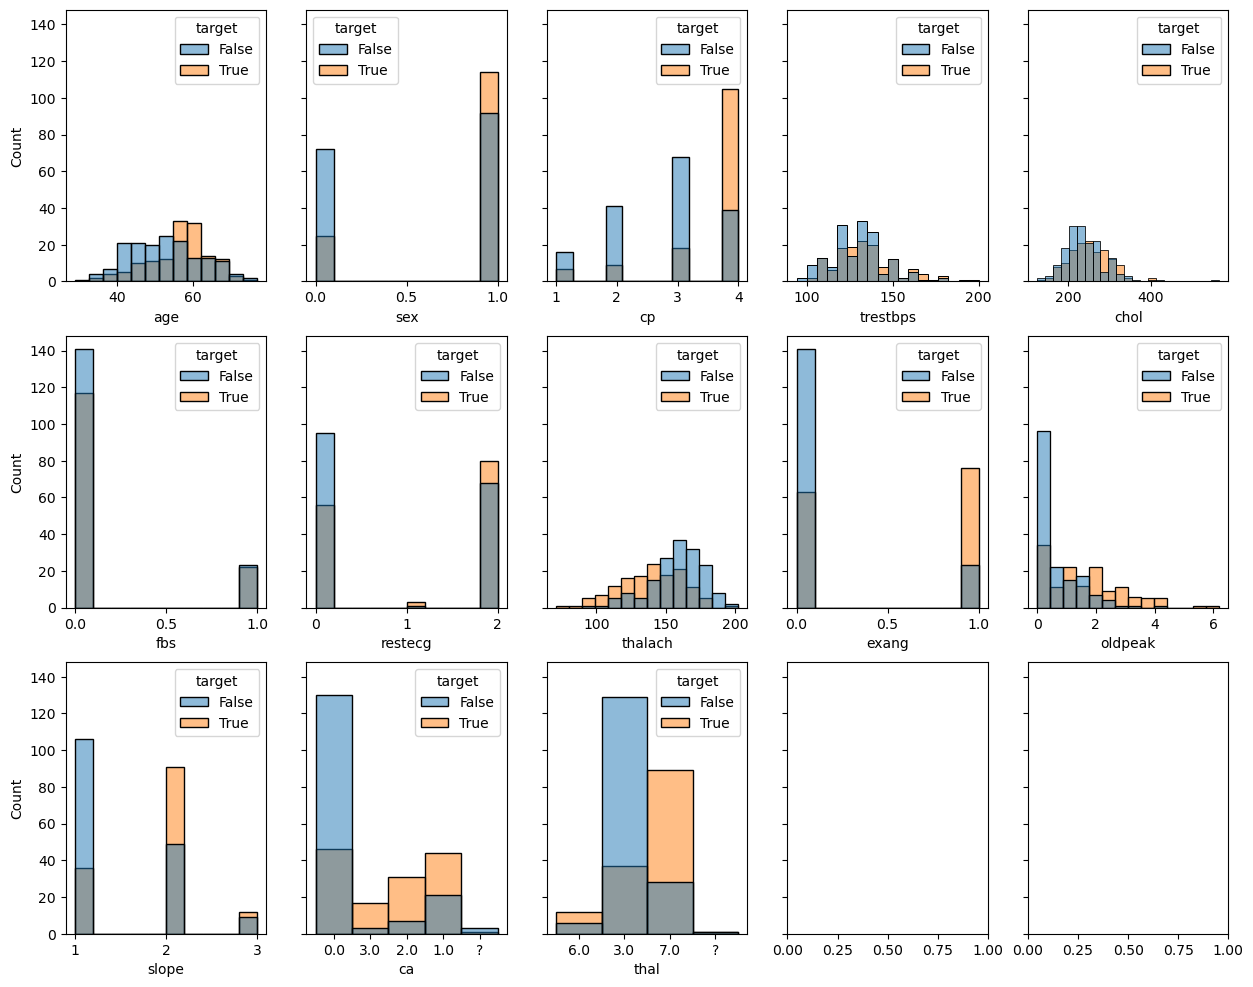

In [11]:
fig, axs = plt.subplots(3,5, figsize = (15,12), sharey = True)
for axi, Xj in zip(axs.flatten()[:-1], X):
    sns.histplot(ax = axi, data = df, x = Xj, hue = 'target')

### Interperetació de les dades
- De dones amb sex, n'hi ha menys de malaltes &rarr; els homes tenen més proporcio de malalts. 
- 0 són dones &rarr; taronja són malaltes i blaves sanes.
- Veiem directament com les proporcions hi han més malalts en homes.

### sex és una variable amb potencial predictiu
- Si fessim una funció de likelihood
- P(x|y) &rarr; x = home/dona &rarr; y = malalt/sa
- Suposem dones 25 malaltes i 75 sanes i 90 homes sans i 110 malalts
- P(x=home | y=malalt) = 110 / 110 + 25 = 110 / 135 = 0.81 
- P(x=home | y=sa) 
- P(x=dona | y=malalt) &rarr; és la resta del primer
- P(x=dona | y=sa)
- Tenim dues distribucions condicionals perquè els dos que tenen comentaris van junts. 
- Com es distribueix homes/dones respecte els malalts &rarr; mirem tots els malalts i mirem la % de homes i dones que hi ha. 
- ---
- P(x=home | y=sa) = 0.54
- P(x=dona | y=sa) = 0.56
- P(x=home | y=malalt) = 0.81
- P(x=dona | y=malalt) = 0.19
- Si està malalt és més versemblant que sigui un home
- No, la % de que estigui malalt si és un home (ho fem al revés)
- Entres a la consulta i estàs malalt &rarr; 80% de ser home
- No! si entra un home 80% d'estar malalt.
- Probabilitat d'estar malalt quan observem un cojunt de coses però per calcular això, fem la pregunta inversa per cada una de les coses.
- Partim de distribució a priori, però diguem a resulta que és home, això modifica la meva creença del que volem saber. 
- **Pacient 0.10 malalt i 0.90 sa (malaltia que afecta la població) &rarr; veiem que es un home llavors multipliquem per 0.81 i ho anem fent per totes les altres variables.** 
- Va un home: 
- P(y=malalt) = 0.10 * 0.81
- P(y=sa) = 0.90 * 0.54
- ---
- thalach (variable continua) &rarr; la cosa es complica, hem de fer les pdf
- els sans n'hi ha més
- Això són les funcions de versemblança 
- Ens mostra el talah donat que son malalts P(x|y)
- Aquestes condicionals són les de versemblança
- Les categoriques no es veu tant clar, però es el mateix, s'han de relacionar igual homes sans/malalts i no homes/dones en la mateixa barra.
- ---
- Els ? tenen pinta de missing values
- Els qeu no hi ha res es normal per la matriu

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    bool   
dtypes: bool(1), float64(11), object(2)
memory usage: 31.2+ KB


In [14]:
df.groupby('ca').target.value_counts()

ca   target
0.0  False     130
     True       46
1.0  True       44
     False      21
2.0  True       31
     False       7
3.0  True       17
     False       3
?    False       3
     True        1
Name: target, dtype: int64

In [15]:
# Convertim els ? en 4
df['ca'] = df.ca.apply(lambda x: ['0.0', '1.0', '2.0', '3.0', '?'].index(x))
df.groupby('ca').target.value_counts()

ca  target
0   False     130
    True       46
1   True       44
    False      21
2   True       31
    False       7
3   True       17
    False       3
4   False       3
    True        1
Name: target, dtype: int64

In [16]:
df.groupby('thal').target.value_counts()

thal  target
3.0   False     129
      True       37
6.0   True       12
      False       6
7.0   True       89
      False      28
?     False       1
      True        1
Name: target, dtype: int64

In [17]:
# Factoritzem aquesta variable: 
df['thal'] = df.thal.apply(lambda x: ['3.0', '6.0', '7.0', '?'].index(x))
df.groupby('thal').target.value_counts()

thal  target
0     False     129
      True       37
1     True       12
      False       6
2     True       89
      False      28
3     False       1
      True        1
Name: target, dtype: int64

El que implica el mappeig es que hem categoritzat aquesta info. Ho hem de canviar al diccionari. No tenim una relació d'ordre entre els numeros. Algo més gran que una altre no vol dir res.
<br/>
<br/>
No cal que ho fem això. Com que estudiem el valor de la x independentment de les altres. Una distribució la estimem amb alguns registres menys. 
<br />
<br/>
Per aquells registres en concret no podem fer inferencia.

In [18]:
# X['thal'] = 0
# Ja ho teniem bé. 

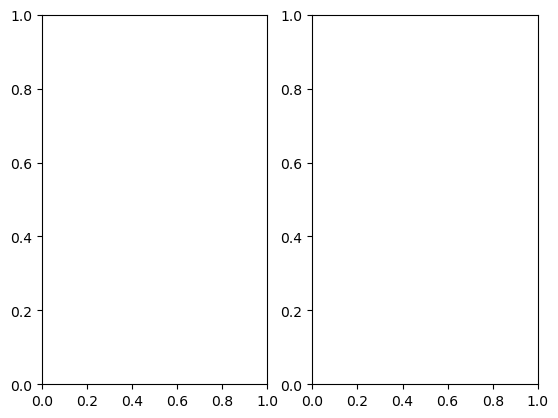

In [19]:
fig, axs = plt.subplots(1,2)

Likelihood functions

In [20]:
from scipy.stats import gaussian_kde

### Continuous variables

In [21]:
lkh0_age = gaussian_kde(df.age.loc[df.target == False].transpose(), bw_method = 'scott')
lkh1_age = gaussian_kde(df.age.loc[df.target == True].transpose(), bw_method = 'scott')

### Discrete variables

In [22]:
# Tenir amb compte que el value_counts, sempre retorna el que és més gran al primer. 
lkh0_sex = df.loc[df.target == False].groupby('target').sex.value_counts(normalize = True).sort_index()
lkh1_sex = df.loc[df.target == True].groupby('target').sex.value_counts(normalize = True).sort_index()
lkh0_sex, lkh1_sex

(target  sex
 False   0.0    0.439024
         1.0    0.560976
 Name: sex, dtype: float64,
 target  sex
 True    0.0    0.179856
         1.0    0.820144
 Name: sex, dtype: float64)

És el mateix que abans amb el 0.81 de home/dona d'abans

### Laplacian smoothing

In [23]:
# Per un altre dia

Ara passem a la part de PIA (programació de intel·ligencia artificial). Fins ara era generar el model (cosa conceptual). Com si tinguessim 300 variables.

Diccionari on guardem tota la informació (si es variable continua/discreta, categories (home sa x, blau sa x, etc, totes les possibilitats), kde per sans/malalts). Això ho podríem fer amb una classe també.

In [24]:
lkhDict = {Xj: {'dtype': dt, 'cats': [], 'lkh0': None, 'lkh1': None} for Xj, dt in X.items()}
lkhDict

{'age': {'dtype': 1, 'cats': [], 'lkh0': None, 'lkh1': None},
 'sex': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None},
 'cp': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None},
 'trestbps': {'dtype': 1, 'cats': [], 'lkh0': None, 'lkh1': None},
 'chol': {'dtype': 1, 'cats': [], 'lkh0': None, 'lkh1': None},
 'fbs': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None},
 'restecg': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None},
 'thalach': {'dtype': 1, 'cats': [], 'lkh0': None, 'lkh1': None},
 'exang': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None},
 'oldpeak': {'dtype': 1, 'cats': [], 'lkh0': None, 'lkh1': None},
 'slope': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None},
 'ca': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None},
 'thal': {'dtype': 0, 'cats': [], 'lkh0': None, 'lkh1': None}}

Per cada variable contemplo les dues possibilitats. Si es variable continua, farem un gaussian. 

In [25]:
# alpha = 1
for Xj in X:
    if lkhDict[Xj]['dtype'] == 1:
        # No cal el transpose perquè és una sola columna
        lkhDict[Xj]['lkh0'] = gaussian_kde(df[Xj].loc[df.target == False], bw_method = 'scott')
        lkhDict[Xj]['lkh1'] = gaussian_kde(df[Xj].loc[df.target == True], bw_method = 'scott')
    else:
        # Per cada un mirem quants valors té i ho normalitzem dividint per el total
        lkhDict[Xj]['lkh0'] = df[Xj].loc[df.target == False].value_counts(normalize = True).sort_index().to_numpy()
        lkhDict[Xj]['lkh1'] = df[Xj].loc[df.target == True].value_counts(normalize = True).sort_index().to_numpy()


In [26]:
for Xj in lkhDict:
    print('--- %s %s' %(Xj, 'continuous' if X[Xj] else 'discrete'))
    print('--- lkh_0 %s' %lkhDict[Xj]['lkh0'])
    print('--- lkh_1 %s' %lkhDict[Xj]['lkh1'])

--- age continuous
--- lkh_0 <scipy.stats._kde.gaussian_kde object at 0x0000024CA0F32BD0>
--- lkh_1 <scipy.stats._kde.gaussian_kde object at 0x0000024CA14E55D0>
--- sex discrete
--- lkh_0 [0.43902439 0.56097561]
--- lkh_1 [0.17985612 0.82014388]
--- cp discrete
--- lkh_0 [0.09756098 0.25       0.41463415 0.23780488]
--- lkh_1 [0.05035971 0.0647482  0.1294964  0.75539568]
--- trestbps continuous
--- lkh_0 <scipy.stats._kde.gaussian_kde object at 0x0000024CA0F4F090>
--- lkh_1 <scipy.stats._kde.gaussian_kde object at 0x0000024CA0F4DAD0>
--- chol continuous
--- lkh_0 <scipy.stats._kde.gaussian_kde object at 0x0000024CA0F4EF10>
--- lkh_1 <scipy.stats._kde.gaussian_kde object at 0x0000024CA0F4D350>
--- fbs discrete
--- lkh_0 [0.8597561 0.1402439]
--- lkh_1 [0.84172662 0.15827338]
--- restecg discrete
--- lkh_0 [0.57926829 0.00609756 0.41463415]
--- lkh_1 [0.4028777  0.02158273 0.57553957]
--- thalach continuous
--- lkh_0 <scipy.stats._kde.gaussian_kde object at 0x0000024CA0F4D890>
--- lkh_1 

Sumen 1 en horitzontal i no en vertical, per tant hem d'evaluar per les dues funcions, perque estem evaluant el % de que sigui home/dona

#### prior

In [27]:
prior0, prior1 = df.target.value_counts(normalize = True).sort_index()
print('--- heart disease')
print('--- False %6.4f' %prior0)
print('--- True %6.4f' %prior1)

--- heart disease
--- False 0.5413
--- True 0.4587


#### posterior
funcio d'evaluació, prob d'una serie de valors (dades d'un pacient) propies del model i que ens evalui (diagnostiqui) si te la malaltia o no la té.

In [28]:
def evaluate_post(row):
    # encara no hem evaluat cap dada, són iguals
    post0, post1 = prior0, prior1
    
    # Per cada dada, multipliquem el seu valor
    for Xj in lkhDict:
        dt, lkh0, lkh1 = lkhDict[Xj]['dtype'], lkhDict[Xj]['lkh0'], lkhDict[Xj]['lkh1']
        if dt == 1:
            # Donat que es sa, sabem l'altre
            post0 *= lkh0.evaluate(row[Xj])[0]
            post1 *= lkh1.evaluate(row[Xj])[0]
        else:
            post0 *= lkh0[int(row[Xj])]
            post1 *= lkh1[int(row[Xj])]
        return post1 > post0

In [29]:
df['predicted'] = df.apply(lambda row: evaluate_post(row), axis = 1)

In [30]:
df.groupby('target').predicted.value_counts()

target  predicted
False   False        105
        True          59
True    True          91
        False         48
Name: predicted, dtype: int64